# Projecting Viral Tweet Potential

For this project, we're going to use K-Nearest Neighbors to predict if a tweet
will go viral. But what features of a tweet determine is popularity?
We'll take a look at a variety of features to make our best prediction.

## Imports

Our imports are pandas, numpy, sklearn, and matplotlib for graphing.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Data Evaluation

A few options are available to us. Let take a look at them.

In [2]:
all_tweets = pd.read_json("random_tweets.json", lines=True)
print(list(all_tweets.columns))

['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str', 'extended_entities', 'quoted_status', 'withheld_in_countries']


Let's also see how many tweets exist in the dataset and what they look like.

In [3]:
print(len(all_tweets))
print(all_tweets.loc[0]['text'])
print(all_tweets.loc[0]['user'])
print(all_tweets.loc[0]['user']['location'])

11099
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4475, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '022330', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twim

There are a few methods to decide virality, but lets define it as having more retweets than the median number of retweets.
We'll classify viral as `1` and not viral as `0`.

In [4]:
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > np.median(all_tweets['retweet_count']), 1, 0)
print(all_tweets['is_viral'].value_counts())

0    5562
1    5537
Name: is_viral, dtype: int64


### Tweet Features
Now that we have our labels, lets work out the features we will use:
- `retweet_count`: The amount of times a tweet was retweeted
- `tweet_length`: The length of the tweet
- `followers_count`: The number of followers a user has
Let's make them into columns in our dataframe.

In [5]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

### Normalizing the Data
Now that we've made the columns we want, lets put them into our classifier and get rid of
non-relevant data. `scaled_data` will be a version of our data using scikitlearn's scaling feature.

In [6]:
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count']]
scaled_data = scale(data, axis=0)
print(scaled_data)

[[ 0.6164054  -0.02878298 -0.14483305]
 [-1.64577622 -0.02886246 -0.16209787]
 [ 0.6164054  -0.02887736 -0.11566596]
 ...
 [ 0.6164054  -0.02918038 -0.1768776 ]
 [ 0.6164054  -0.02955792 -0.14679496]
 [-1.71759151 -0.02208668  0.0333085 ]]


## The Training Set and Test Set
Let's make our training and test sets. We'll use set `test_size` to 20% and our `random_state = 1` for consistency across runs.

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size=0.2, random_state=1)

## Building The Model

Now that we have our input data, lets make our `KNeighborsClassifier`. We'll set the number of neighbors to 5
and score it.

In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.5882882882882883


## Improving The Model

Yikes! That isn't very good. But is the problem with our parameters or
input variables? Let's test our classifier parameters first. Namely `k`, our number of neighbors.

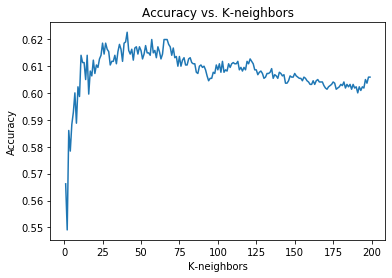

Our max accuracy is: 0.6225225225225225 at k=40


In [9]:
# creating a scores list to store our accuracies
scores = []

# testing different k-values
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

# plotting the
plt.plot(range(1, 200), scores)
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K-neighbors')
plt.show()

print(f'Our max accuracy is: {max(scores)} at k={scores.index(max(scores))}')

So changing our neighbors can increase our accuracy by a bit, but ideally we should pursue other feature groupings
if we want a more accurate predictor of tweet virality.

#### Data Sources
Data was provided by [twitter](https://twitter.com/).